<a href="https://colab.research.google.com/github/Adeola-001/Projects/blob/main/Project_Eniac's_Discount_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exporting and copies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# change display options
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

In [ ]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [ ]:
# create copies of all:
orders_df = orders_qu.copy()
orderlines_df = orderlines_qu.copy()
products_df = products_cl.copy()
brands_df = brands.copy()

## Convert datetime

In [ ]:
# Convert created date column into datetime data type
orders_df['created_date'] = pd.to_datetime(orders_df['created_date'])

In [ ]:
orderlines_df['date'] = pd.to_datetime(orderlines_df['date'])

In [ ]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 2.8+ MB


###Merged tables:

In [ ]:
#extract the first letter from sku to get the brand:
orderlines_df["short"] = orderlines_df["sku"].str[:3]

In [ ]:
# merge orderlines and brands
ordl_brands_df = pd.merge(orderlines_df, brands,
                                how="left",
                                on="short")
#ordl_brands_df.head(3)

In [ ]:
# merge ordl_brands_df (orderlines and brands) with products:
ordl_b_pdts_df = pd.merge(ordl_brands_df, products_df,
                               on="sku", how="left")
#ordl_b_pdts_df.head(3)

In [ ]:
# merge all tables (orderlines_brands_products_orders):
all_merged_df = pd.merge(ordl_b_pdts_df, orders_df, how= "left",
                                    left_on = "id_order", right_on = "order_id")
#all_merged_df.head(3)

In [ ]:
#all_merged_df.info()

In [ ]:
#all_merged_df.isna().sum()

## Calculated fields

### Discount

In [ ]:
all_merged_df["discount"] = all_merged_df["price"] - all_merged_df["unit_price"]
#all_merged_df.head()

### % Discount

In [ ]:
all_merged_df["%discount"] = ((all_merged_df["discount"] / all_merged_df["price"]) * 100).round(2)
#all_merged_df.head()

###Total discounted products

In [ ]:
total_discounted_products =all_merged_df[all_merged_df['discount'] > 0].shape[0]
total_discounted_products = (all_merged_df["discount"] > 0).sum()

In [ ]:
(all_merged_df["discount"] > 0).sum()/(all_merged_df.shape[0])*100

92.81058030095245

In [ ]:
#all_merged_df.sort_values("%discount").head(5)

#### Deal with negative discounts

How much represent this negative values by discount?

In [ ]:
# ## how much % of this negative discounts are from our data:
all_merged_df['is_neg'] = all_merged_df['discount']<0
all_merged_df['is_neg'].mean()

0.02951287783434465

In [ ]:
#how much % of this negative discounts are from our data:

Only 3% of this data has negative discounts, then we drop it

In [ ]:
all_merged_df = all_merged_df.copy()
negative_discounts = all_merged_df.loc[all_merged_df['discount'] <0 ]

In [ ]:
# Drop the negative values:
new_all_merged_df = all_merged_df.loc[all_merged_df["is_neg"] != True]
#new_all_merged_df.head(5)

In [ ]:
all_merged_df = new_all_merged_df.copy()

drop is_neg column

### Revenue

In [ ]:
all_merged_df = all_merged_df.copy()
all_merged_df["revenue"] = all_merged_df["unit_price"] * all_merged_df["product_quantity"]
#all_merged_df

### %Revenue

In [ ]:
total_revenue=all_merged_df["revenue"].sum()
all_merged_df["%revenue"] = (all_merged_df["revenue"] / total_revenue) * 100

### Categories

In [ ]:
category_df = all_merged_df.copy()
category_df["category"] = ""
#category_df.loc[category_df["name"].str.contains("imac|mac mini|mac pro", case=False), "category"] += "desktop, "
category_df.loc[category_df["type"] == "11865403", "category"] += "iPhone case, "
category_df.loc[category_df["type"].isin(["11865403", "12635403","13835403"]),"category"] += "cases, "
category_df.loc[category_df["type"].isin(["12175397", "11935397","1433", "12215397","12655397"]),"category"] += "drivers, "
category_df.loc[category_df["type"].isin(["1364"]),"category"] += "RAM, "
category_df.loc[category_df["type"].isin(["12585395", "1325","12995397", "13615399"]),"category"] += "adapters, chargers & cables "
category_df.loc[category_df["type"].isin(["1282", "5,74E+15","1,02E+12", "2158"]),"category"] += "desktop & laptops, "
category_df.loc[category_df["type"].isin(["1334", "57445397","1229"]),"category"] += "storage & computer accessories, "
category_df.loc[category_df["type"].isin(["11865403", "2449","1229"]),"category"] += "apple accessories, "
category_df.loc[category_df["type"].isin(["13555403"]),"category"] += "phone accessories, "
category_df.loc[category_df["type"].isin(["1298", "11905404","1334", "1515"]),"category"] += "other accessories, "
category_df.loc[category_df["type"].isin(["5384", "5398"]),"category"] += "audio accessories, "
category_df.loc[category_df["type"].isin(["1405"]),"category"] += "tablets, "
category_df.loc[category_df["type"].isin(["1296"]),"category"] += "monitors, "
category_df.loc[category_df["type"].isin(["1,44E+11"]),"category"] += "services, "


#category_df.loc[(category_df["desc"].str.contains("Pro iMac ", case=False))
                      # & (category_df["price"] > 10000)
                      #, "category"] = "expensive mac"

category_df.loc[(category_df["category"] == ""), "category"] = "other"

## New section

In [ ]:
category_df["category"].value_counts()

category
other                                                  16388
drivers,                                                9198
adapters, chargers & cables                             4356
iPhone case, cases, apple accessories,                  4330
other accessories,                                      4183
audio accessories,                                      3096
RAM,                                                    3042
cases,                                                  1681
monitors,                                               1357
tablets,                                                1182
phone accessories,                                       822
storage & computer accessories, apple accessories,       657
storage & computer accessories,                          519
storage & computer accessories, other accessories,       398
apple accessories,                                       256
desktop & laptops,                                       151
services,      

In [ ]:
category_df.sort_values("price", ascending = False).head(5)

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long,name,...,order_id,created_date,total_paid,state,discount,%discount,is_neg,revenue,%revenue,category
17953,1303519,382526,0,1,PAC2067,479.00,2017-07-26 19:41:00,PAC,Pack,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz | 4GB RAM | 500GB HDD",...,382526,2017-07-30 13:05:09,479.00,Completed,1320.00,73.37,False,479.00,0.006401,"desktop & laptops,"
13472,1265635,364414,0,1,PAC2071,489.00,2017-06-11 12:34:44,PAC,Pack,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz | 4GB RAM | 500GB HDD",...,364414,2017-06-11 12:45:07,489.00,Completed,1310.00,72.82,False,489.00,0.006534,"desktop & laptops,"
12109,1251378,357485,0,1,PAC2065,499.00,2017-05-20 07:18:41,PAC,Pack,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz | 4GB RAM | 500GB HDD",...,357485,2017-05-20 07:22:22,499.00,Completed,1300.00,72.26,False,499.00,0.006668,"desktop & laptops,"
8549,1188269,327596,0,1,PAC1916,929.99,2017-02-22 13:49:44,PAC,Pack,"Second hand - Apple iMac 27 ""Core i5 Quad-Core 27GHz | 4GB RAM | 1TB HDD | Mid 2011 (MC813LL / A)",...,327596,2017-02-22 13:52:09,1061.98,Completed,769.01,45.26,False,929.99,0.012427,"desktop & laptops,"
13343,1263347,363228,0,1,PAC2057,349.00,2017-06-07 16:37:00,PAC,Pack,"Second hand - Apple iMac 20 ""Core 2 Duo 24GHz | 4GB RAM | 250GB HDD",...,363228,2017-06-07 16:39:07,355.99,Completed,1150.00,76.72,False,349.00,0.004663,other


## DATA VISUALIZATION

### Top brands

In [ ]:
brands_10_most_sold_df = (
                         all_merged_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

,long,product_quantity
5,Apple,10975
99,OWC,3834
161,Western Digital,2382
9,Belkin,2271
19,Crucial,2029
67,LaCie,1972
128,Satechi,1824
160,Wacom,1788
106,Pack,1707
91,NewerTech,1647


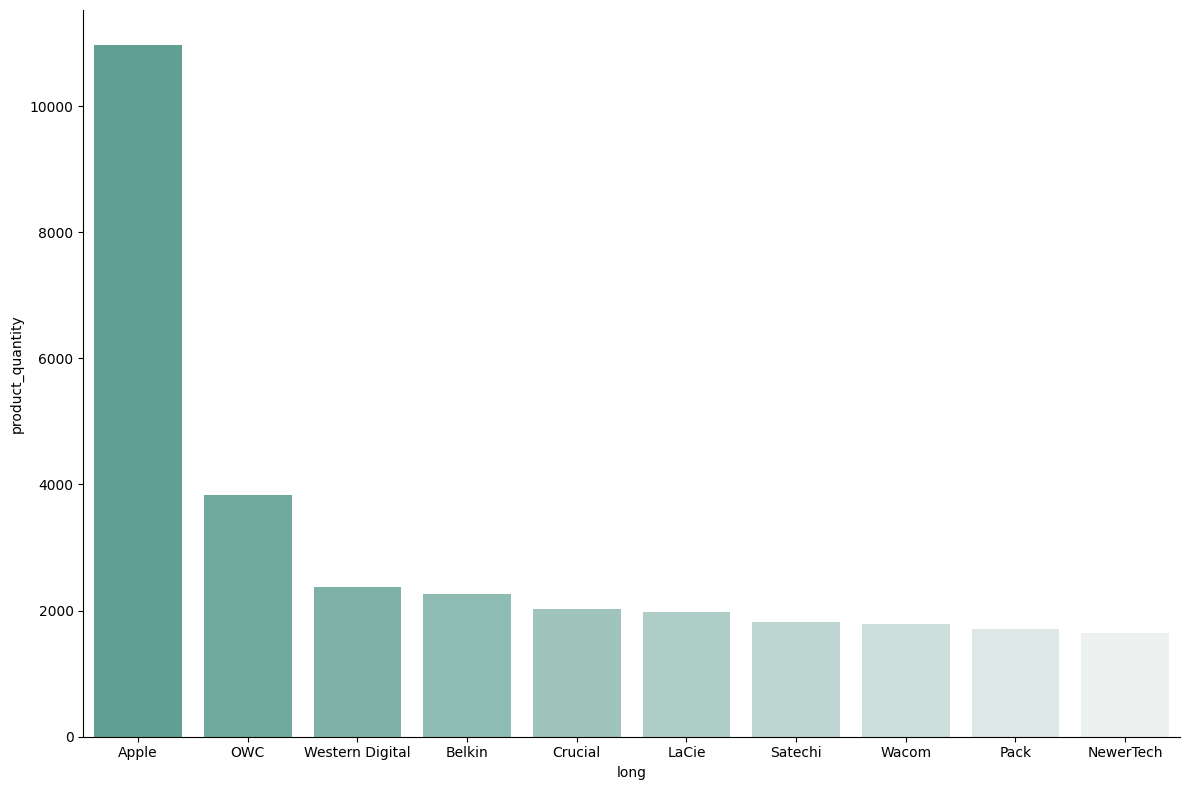

In [ ]:
sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="long",
            y="product_quantity",
            height=8,
            aspect=1.5,
            palette = "light:#5A9_r");


### Brands with revenue

In [ ]:
rev_brands_10_most_sold_df = (
                         all_merged_df.groupby("long", as_index=False)
                         ["revenue"].sum()
                         .nlargest(10, "revenue")
                         )
rev_brands_10_most_sold_df

,long,revenue
5,Apple,2442779.31
106,Pack,462257.80
99,OWC,453923.07
67,LaCie,409150.05
161,Western Digital,361960.04
65,LG,316852.48
160,Wacom,274160.74
19,Crucial,268503.00
24,Dell,258902.07
144,Synology,160346.64


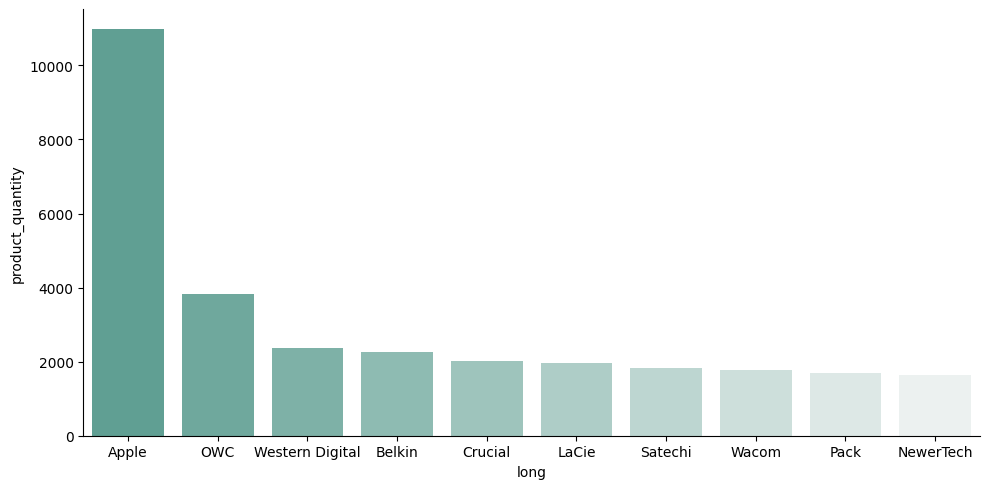

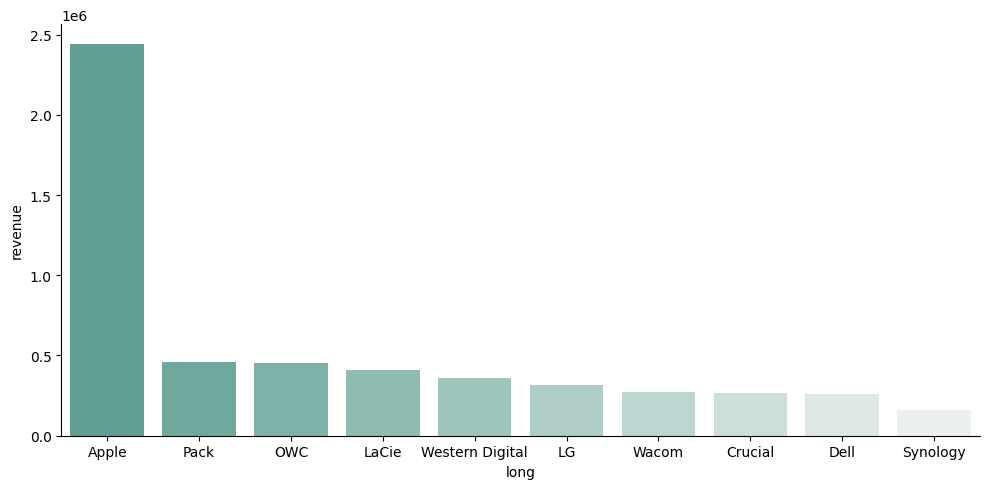

In [ ]:
sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="long",
            y="product_quantity",
            height=5,
            aspect=2,
            palette = "light:#5A9_r");

sns.catplot(kind="bar",
            data=rev_brands_10_most_sold_df,
            x="long",
            y="revenue",
            height=5,
            aspect=2,
            palette = "light:#5A9_r");

###% Discount / Revenue vs Top 10 brands

In [ ]:
revenue_pdiscount_top_10_brands = all_merged_df.groupby("long", as_index=False)[["product_quantity", "%discount", "revenue"]].agg({"product_quantity": "sum", "%discount": "mean", "revenue": "sum"}).nlargest(10, "product_quantity")

In [ ]:
revenue_pdiscount_top_10_brands.sort_values("revenue", ascending=False)

,long,product_quantity,%discount,revenue
5,Apple,10975,17.035818,2442779.31
106,Pack,1707,26.167736,462257.80
99,OWC,3834,22.372688,453923.07
67,LaCie,1972,13.015699,409150.05
161,Western Digital,2382,18.324696,361960.04
160,Wacom,1788,20.266602,274160.74
19,Crucial,2029,13.917205,268503.00
91,NewerTech,1647,35.540755,89397.84
128,Satechi,1824,30.274551,74210.40
9,Belkin,2271,29.294820,71469.98


In [ ]:
revenue_pdiscount_top_10_brands.sort_values("%discount", ascending=False)

,long,product_quantity,%discount,revenue
91,NewerTech,1647,35.540755,89397.84
128,Satechi,1824,30.274551,74210.40
9,Belkin,2271,29.294820,71469.98
106,Pack,1707,26.167736,462257.80
99,OWC,3834,22.372688,453923.07
160,Wacom,1788,20.266602,274160.74
161,Western Digital,2382,18.324696,361960.04
5,Apple,10975,17.035818,2442779.31
19,Crucial,2029,13.917205,268503.00
67,LaCie,1972,13.015699,409150.05


In [ ]:
grouped_df = (all_merged_df.groupby('long', as_index=False).resample('D', on='date')[["product_quantity", "%discount",'revenue']].agg({"product_quantity": "sum", "%discount": "mean", "revenue": "sum"})).head(10)

test with challenge 4

In [ ]:
top_10_pick_revenue_df = (all_merged_df.loc[all_merged_df["date"].between("2017-11-01", "2018-01-31")]
                      .groupby("name")
                      [["product_quantity", "%discount", "revenue"]].agg({"product_quantity": "sum", "%discount": "mean", "revenue": "sum"})
                      .nlargest(10, "product_quantity")
                      ).copy()

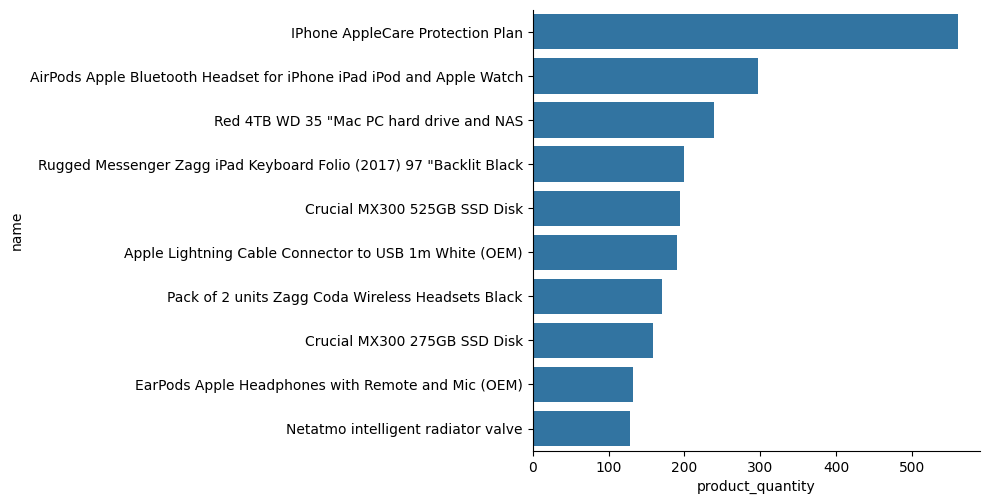

In [ ]:
sns.catplot(data=top_10_pick_revenue_df,
            kind='bar',
            y='name',
            x='product_quantity');

In [ ]:
top_10_pick_revenue_df = (all_merged_df.loc[all_merged_df["date"].between("2017-11-01", "2018-01-31")]
                      .groupby("name")
                      [["product_quantity", "%discount", "revenue"]].agg({"product_quantity": "sum", "%discount": "mean", "revenue": "sum"})
                      .nlargest(10, "product_quantity")
                      ).copy()

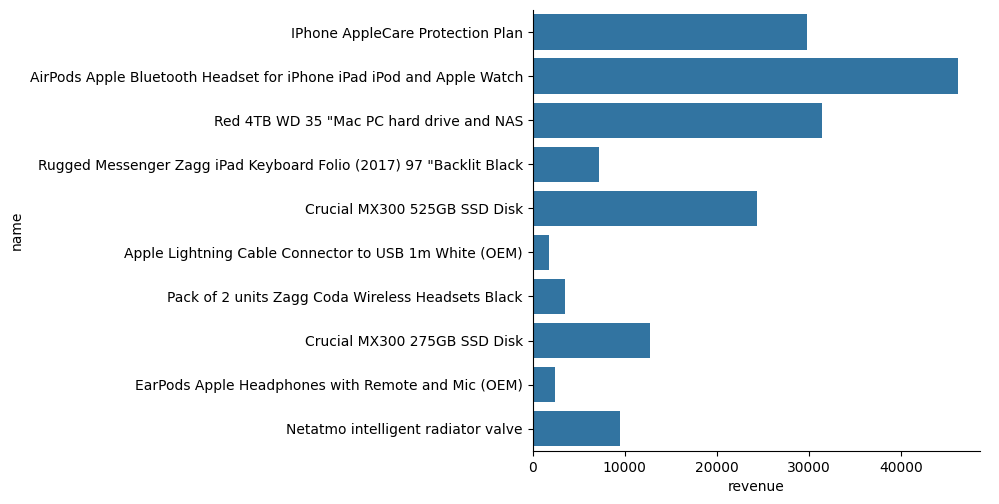

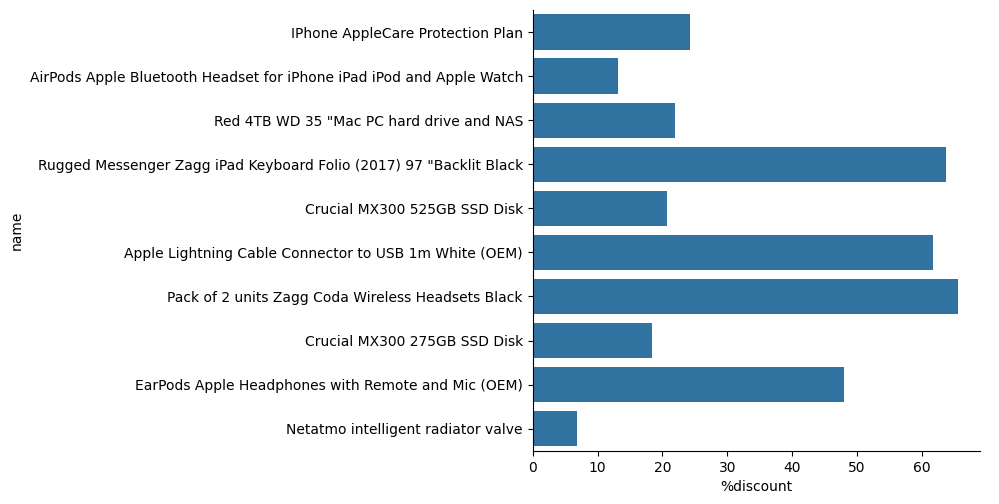

In [ ]:
sns.catplot(data=top_10_pick_revenue_df,
            kind='bar',
            y='name',
            x='revenue');
sns.catplot(data=top_10_pick_revenue_df,
            kind='bar',
            y='name',
            x='%discount');

In [ ]:
#sns.lineplot(data=all_merged_df, x='date', y='revenue', label='Revenue')
#sns.lineplot(data=all_merged_df, x='date', y='discount', label='Discount')

#### Revenue and discount through time (Day)

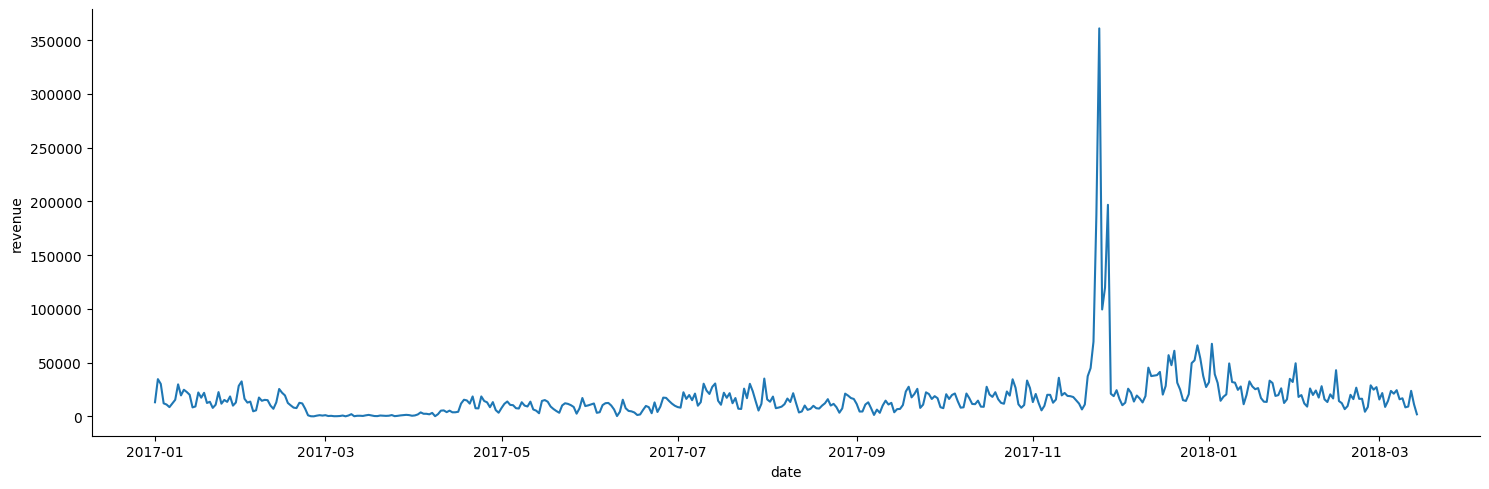

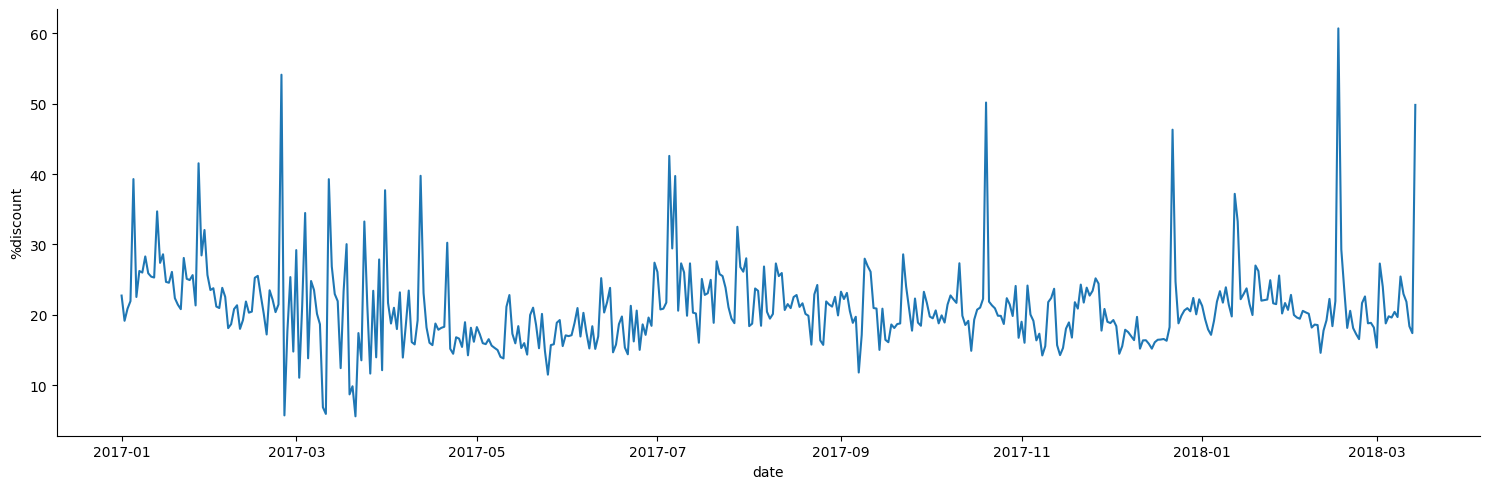

In [ ]:
test_line= all_merged_df.resample('D', on='date')[['revenue', '%discount']].agg({'revenue':'sum', '%discount':'mean'}).copy()
sns.relplot(data=test_line, x='date',y='revenue', kind='line', aspect=3);
sns.relplot(data=test_line, x='date',y='%discount', kind='line', aspect=3);

#### Revenue and discount through time (Month)

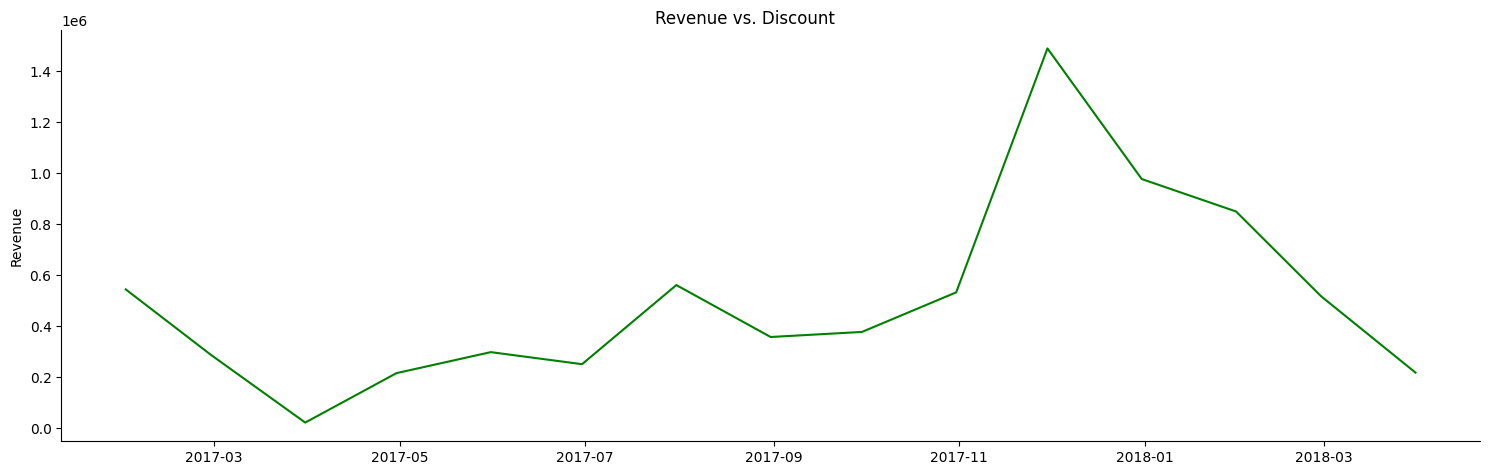

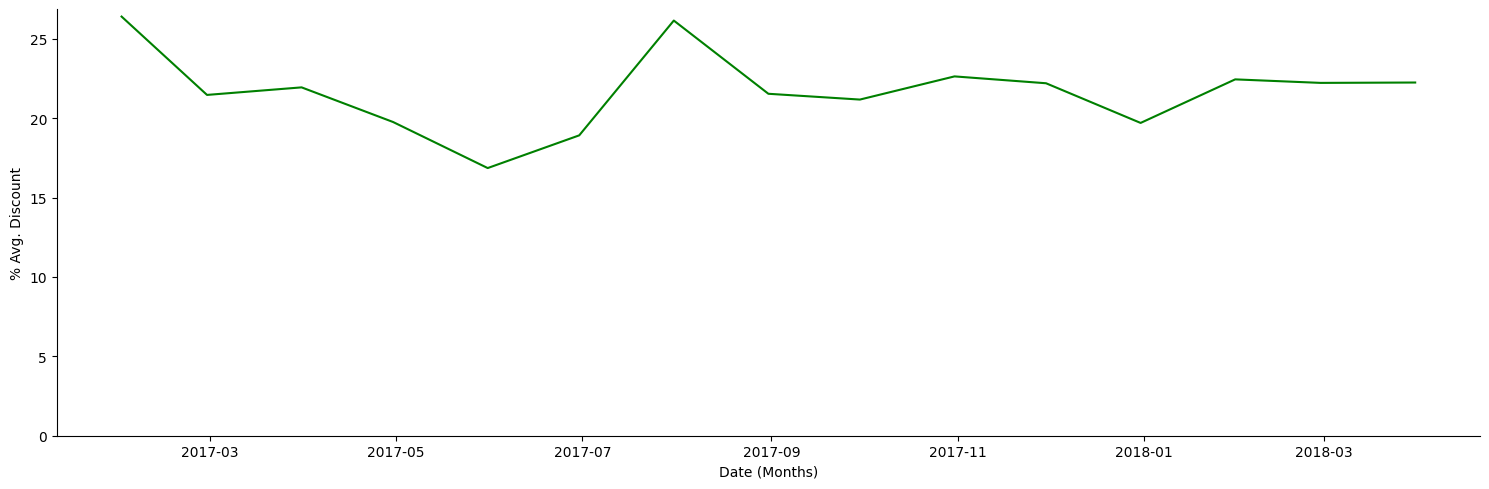

In [ ]:
test_line= all_merged_df.resample('M', on='date')[['revenue', '%discount']].agg({'revenue':'sum', '%discount':'mean'}).copy()
sns.relplot(data=test_line, x='date',y='revenue', kind='line', aspect=3, color='green').figure.suptitle("Revenue vs. Discount");
for ax in plt.gcf().axes:
    ax.set(xlabel=None, ylabel='Revenue')
sns.relplot(data=test_line, x='date',y='%discount', kind='line', aspect=3, color='green');plt.ylim(0)
for ax in plt.gcf().axes:
    ax.set(xlabel='Date (Months)', ylabel='% Avg. Discount')


###Revenue and Discount Relationship

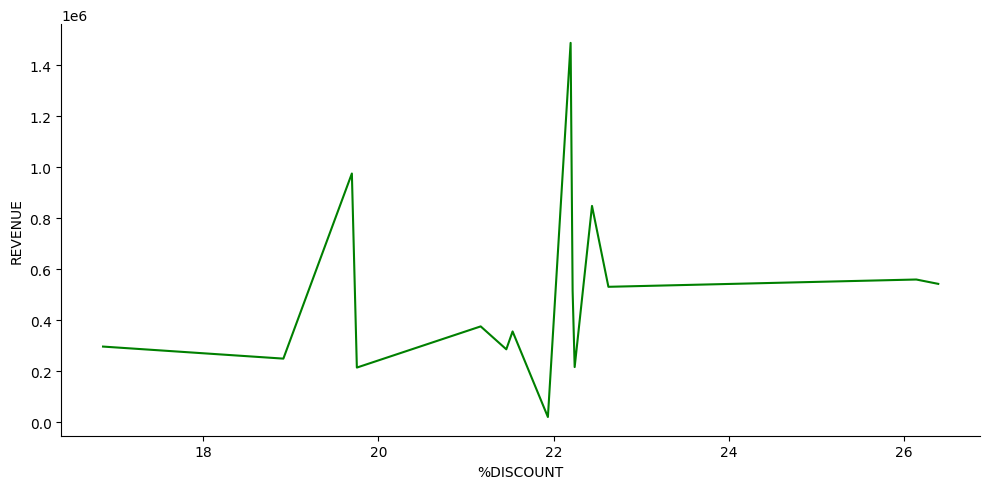

In [ ]:
sns.relplot(test_line, x='%discount',y='revenue', kind='line', aspect=2, color='green');
for ax in plt.gcf().axes:
    ax.set(xlabel='%DISCOUNT', ylabel='REVENUE')

###Revenue and Discount for Apple Products

In [ ]:
apple_products= all_merged_df.loc[all_merged_df['long']=='Apple']
apple_vs_rev= apple_products.resample('M', on='date')[['revenue', '%discount']].agg({'revenue':'sum', '%discount':'mean'})

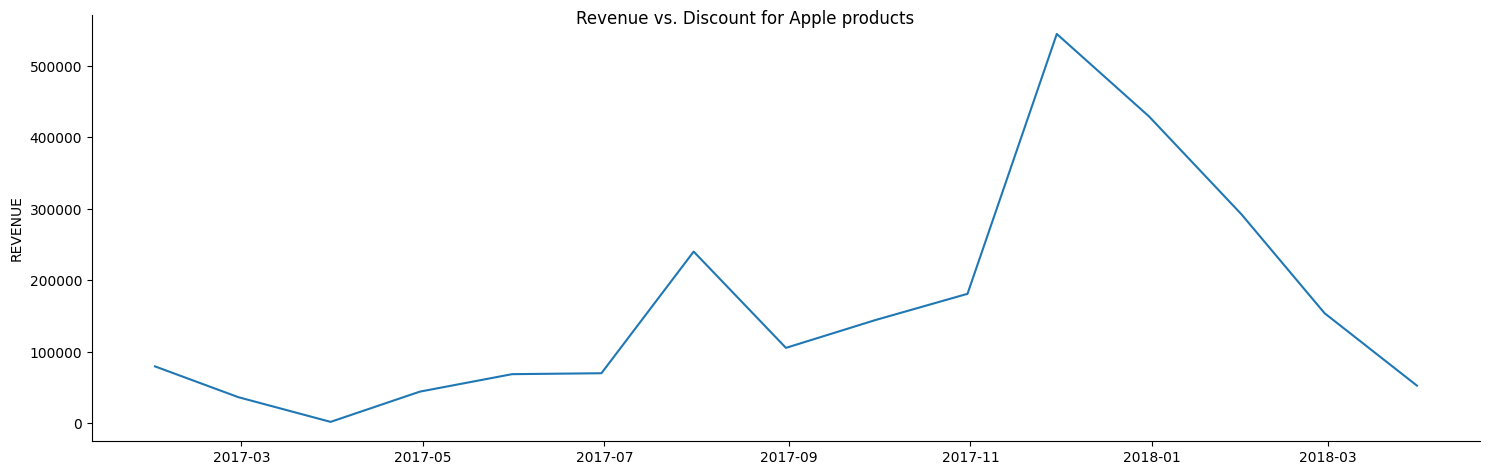

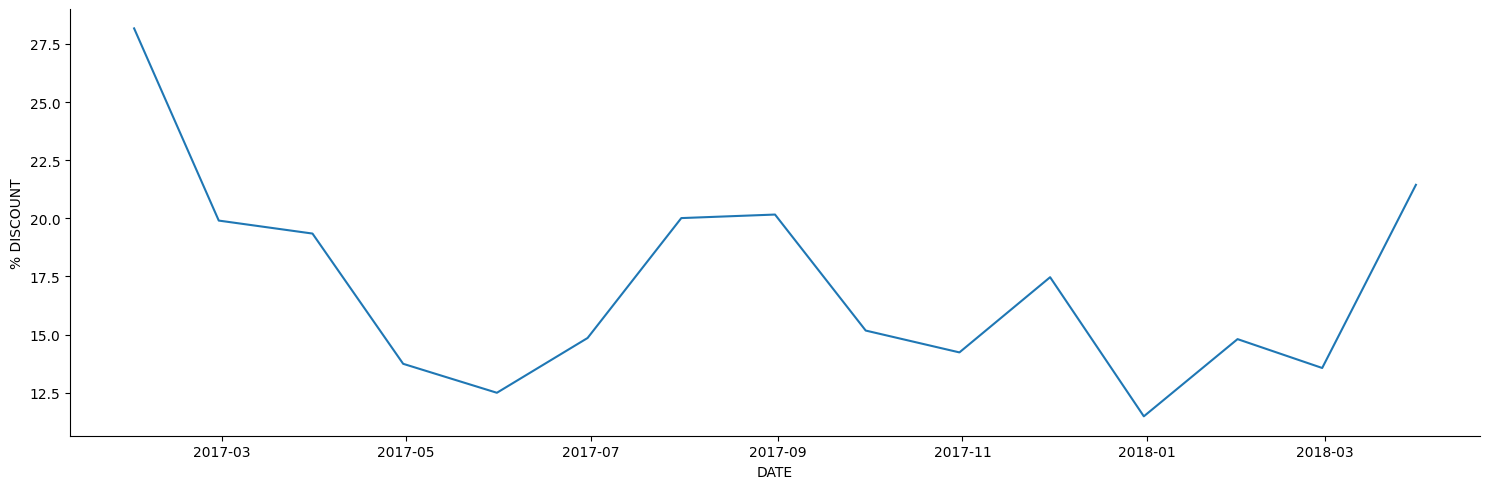

In [ ]:
sns.relplot(apple_vs_rev, x='date',y='revenue', kind='line', aspect=3).figure.suptitle("Revenue vs. Discount for Apple products");
for ax in plt.gcf().axes:
    ax.set(xlabel=None, ylabel='REVENUE')
sns.relplot(apple_vs_rev, x='date',y='%discount', kind='line', aspect=3);
for ax in plt.gcf().axes:
    ax.set(xlabel='DATE', ylabel='% DISCOUNT')

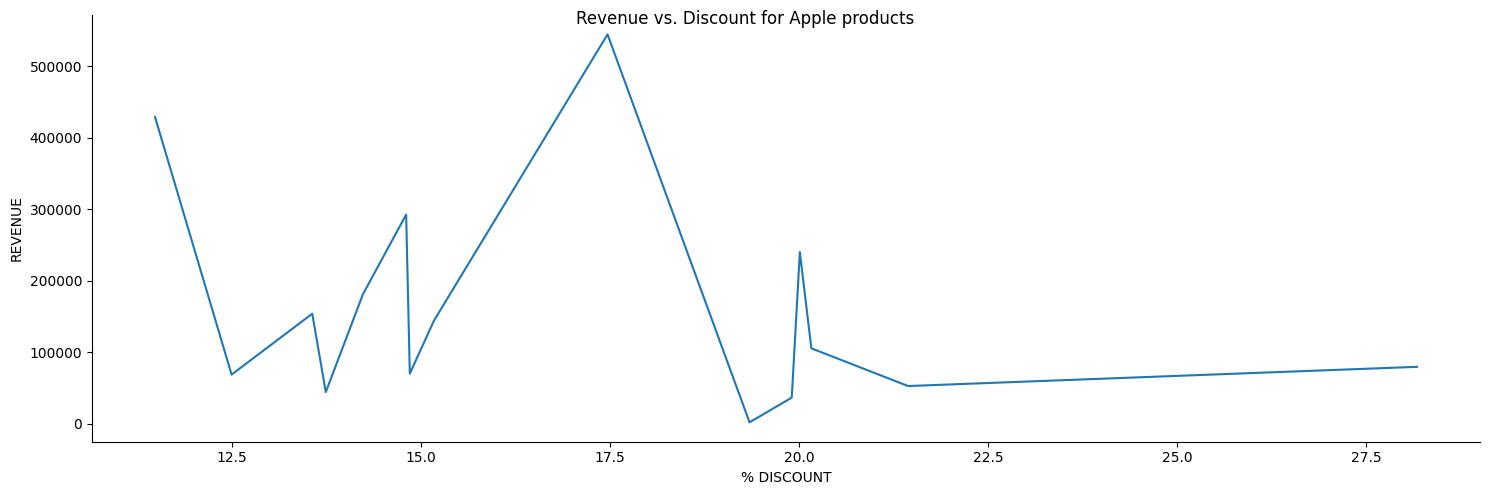

In [ ]:
sns.relplot(apple_vs_rev, x='%discount',y='revenue', kind='line', aspect=3).figure.suptitle("Revenue vs. Discount for Apple products");
for ax in plt.gcf().axes:
    ax.set(xlabel='% DISCOUNT', ylabel='REVENUE')

##Comparing Revenue Generated by Discounted products and Non_discounted products

######Not discounted

In [ ]:
not_discounted_products=all_merged_df.loc[all_merged_df['discount'] ==0]
not_discounted= not_discounted_products.groupby('name')[['revenue']].agg({'revenue':'sum'}).sort_values('revenue', ascending=False).head(5).copy()

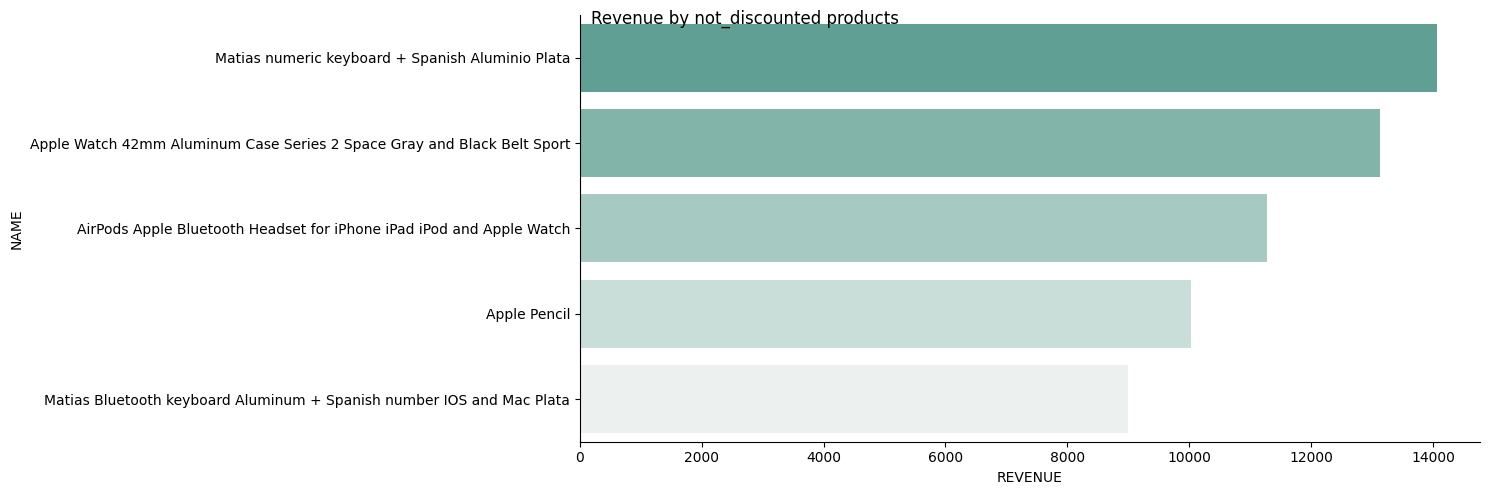

In [ ]:
sns.catplot(not_discounted, x='revenue',y='name', kind='bar', aspect=3, palette = "light:#5A9_r").figure.suptitle("Revenue by not_discounted products");
for ax in plt.gcf().axes:
    ax.set(xlabel='REVENUE', ylabel='NAME')

#####Discounted

In [ ]:
most_discount=all_merged_df.loc[all_merged_df['discount']>0]
most_discounted_pdts= most_discount.groupby('name')[['revenue', '%discount']].agg({'revenue':'sum', '%discount':'mean'}).sort_values('%discount', ascending=False).head(10).copy()

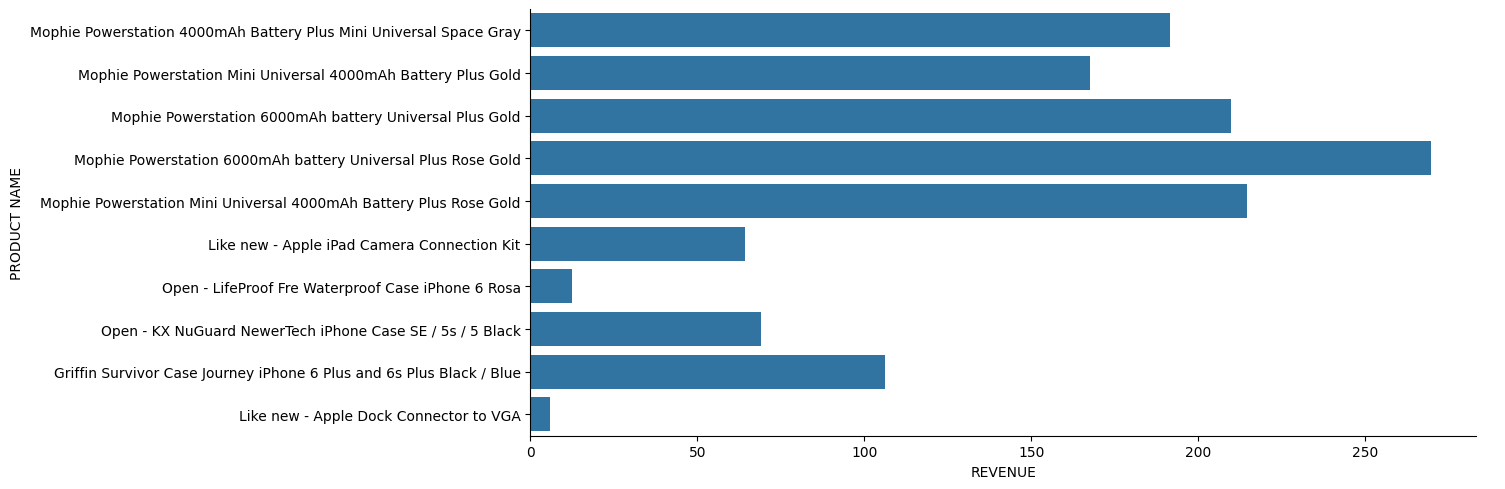

In [ ]:
sns.catplot(most_discounted_pdts, y='name',x='revenue', kind='bar', aspect=3);
for ax in plt.gcf().axes:
    ax.set(xlabel='REVENUE', ylabel='PRODUCT NAME')

##Customer Behavior Vs. Discount

In [ ]:
products_vs_discount=  all_merged_df.resample('M', on='date')[['product_quantity', '%discount']].agg({'product_quantity':'sum', '%discount':'mean'})
products_vs_discount

,product_quantity,%discount
date,,
2017-01-31,6550,26.393445
2017-02-28,2713,21.460232
2017-03-31,222,21.935279
2017-04-30,2029,19.753263
2017-05-31,2411,16.854364
2017-06-30,1944,18.914022
2017-07-31,4469,26.142758
2017-08-31,2919,21.532021
2017-09-30,2678,21.167643


In [ ]:
Order_id_vs_discount=  all_merged_df.resample('M', on='date')[['order_id', '%discount']].agg({'order_id':'count', '%discount':'mean'})
Order_id_vs_discount

,order_id,%discount
date,,
2017-01-31,5770,26.393445
2017-02-28,2411,21.460232
2017-03-31,197,21.935279
2017-04-30,1790,19.753263
2017-05-31,2021,16.854364
2017-06-30,1641,18.914022
2017-07-31,3981,26.142758
2017-08-31,2607,21.532021
2017-09-30,2384,21.167643


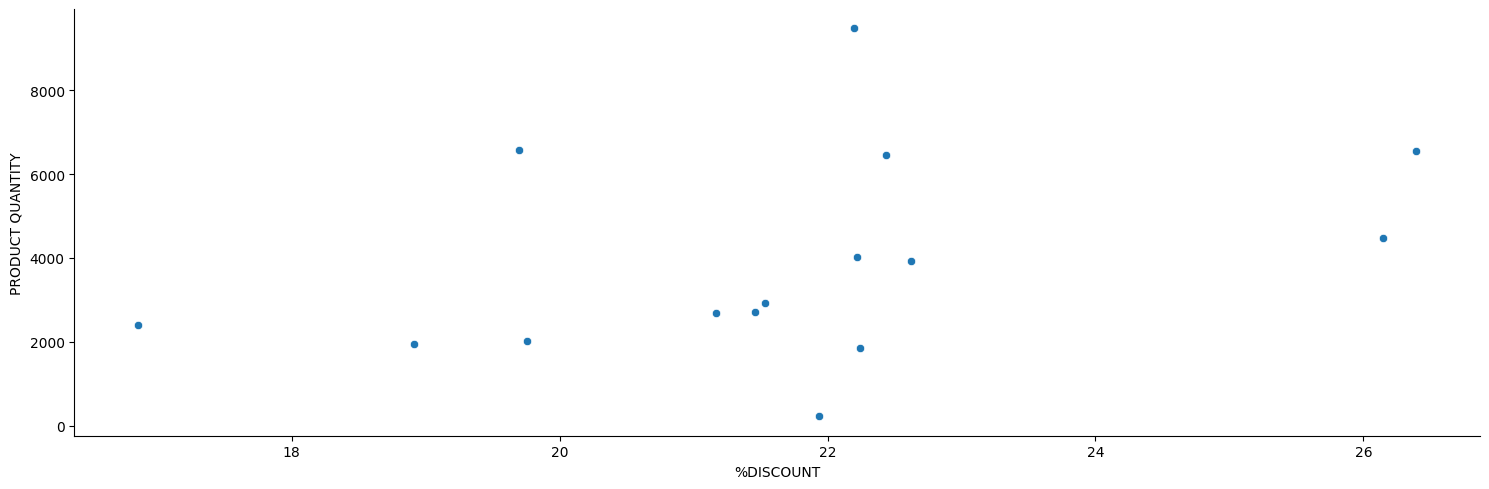

In [ ]:
sns.relplot(products_vs_discount, y='product_quantity',x='%discount', kind='scatter', aspect=3);
for ax in plt.gcf().axes:
    ax.set(xlabel='%DISCOUNT', ylabel='PRODUCT QUANTITY')

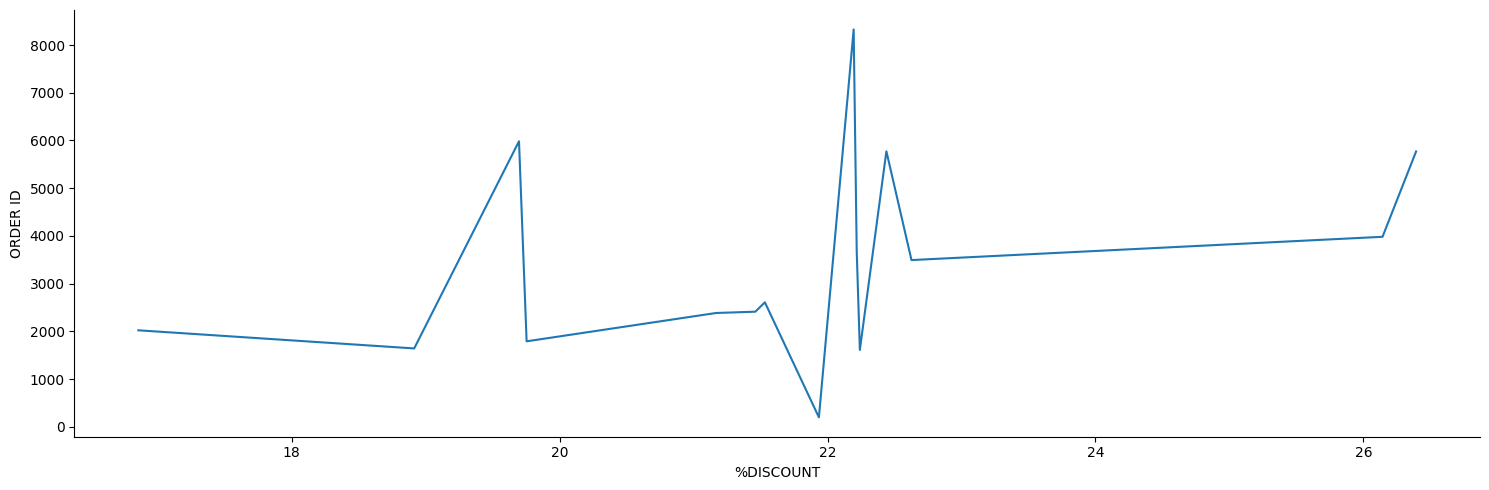

In [ ]:
sns.relplot(Order_id_vs_discount, y='order_id',x='%discount', kind='line', aspect=3);
for ax in plt.gcf().axes:
    ax.set(xlabel='%DISCOUNT', ylabel='ORDER ID')

In [ ]:
productQuantity_vs_discount=  all_merged_df.groupby('sku')[['product_quantity', '%discount']].agg({'product_quantity':'sum', '%discount':'mean'})
productQuantity_vs_discount

,product_quantity,%discount
sku,,
8MO0001-A,1,62.970000
8MO0003-A,1,63.290000
8MO0007,7,36.358571
8MO0008,11,38.318000
8MO0009,5,50.076000
...,...,...
ZAG0040,1,32.510000
ZAG0041,1,33.340000
ZAG0042,1,33.340000


##Brands Vs. Revenue

###Most Revenue

In [ ]:
Brands_vs_Prevenue_l = all_merged_df.groupby("long", as_index=False)["%revenue"].sum().nlargest(5, "%revenue")
Brands_vs_Prevenue_l

,long,%revenue
5,Apple,32.641238
106,Pack,6.176844
99,OWC,6.065473
67,LaCie,5.467200
161,Western Digital,4.836632


In [ ]:
Brands_vs_Prevenue_l = all_merged_df.groupby("long", as_index=False)[["%revenue", '%discount']].agg({"%revenue":'sum', '%discount':'mean'}).nlargest(5, "%revenue")
Brands_vs_Prevenue_l

,long,%revenue,%discount
5,Apple,32.641238,17.035818
106,Pack,6.176844,26.167736
99,OWC,6.065473,22.372688
67,LaCie,5.467200,13.015699
161,Western Digital,4.836632,18.324696


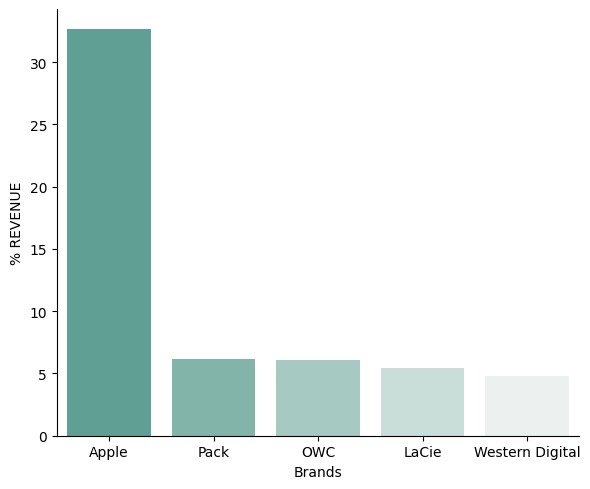

In [ ]:
sns.catplot(Brands_vs_Prevenue_l, x='long', y='%revenue', kind='bar', aspect=1.2,palette = "light:#5A9_r").set_axis_labels('Brands','% REVENUE');

###Least revenue

In [ ]:
Brands_vs_Prevenue_s = all_merged_df.groupby("long", as_index=False)[["%revenue", '%discount']].agg({"%revenue":'sum', '%discount':'mean'}).nsmallest(5, "%revenue")
Brands_vs_Prevenue_s

,long,%revenue,%discount
12,BlueLounge,0.000170,36.37
80,Mistify,0.000187,6.67
103,Opulus,0.000239,77.63
13,BodyGuardz,0.000374,30.01
121,Retrak Utopia,0.000397,25.76


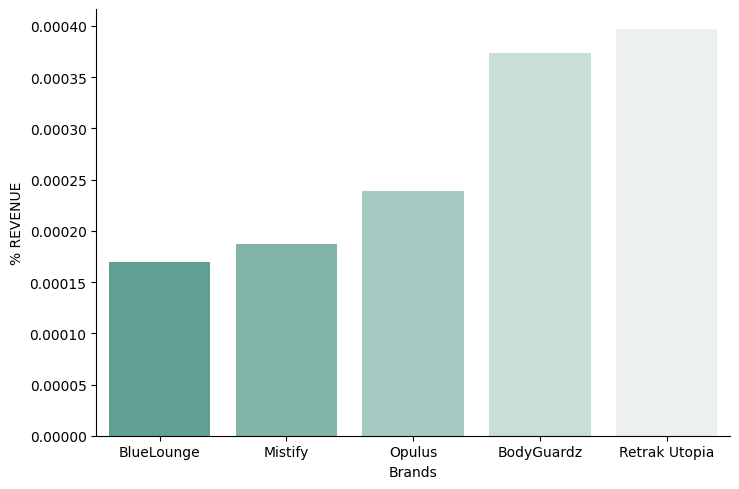

In [ ]:
sns.catplot(Brands_vs_Prevenue_s, x='long', y='%revenue', kind='bar', aspect=1.5, palette = "light:#5A9_r").set_axis_labels('Brands','% REVENUE');

### Discounted and Non_discounted products Vs. Revenue

In [ ]:
#not_discounted_products.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long,name,...,type,order_id,created_date,total_paid,state,discount,%discount,is_neg,revenue,%revenue
82,1119928,299947,0,1,APP1482,549.00,2017-01-01 20:32:33,APP,Apple,Apple iPhone 64GB Silver,...,NaN,299947,2017-01-01 20:36:30,549.00,Completed,0.0,0.0,False,549.00,0.007336
86,1119968,299968,0,1,ADN0019,7.99,2017-01-01 20:53:05,ADN,Adonit,Adonit Jot Pro Disc Replacement Flip mini and Touch Size S,...,1229,299968,2017-01-03 12:19:25,11.98,Completed,0.0,0.0,False,7.99,0.000107
107,1120126,300046,0,1,APP0482,35.00,2017-01-01 22:18:34,APP,Apple,Adapter Apple Lightning to SD Card Reader,...,5395,300046,2017-01-02 20:01:02,41.99,Completed,0.0,0.0,False,35.00,0.000468


In [ ]:
Rev_by_no_discount= not_discounted_products.groupby("name", as_index=False)[['revenue', '%revenue','%discount' ]].agg({'revenue':'sum', '%revenue': 'sum', '%discount':'mean'}).sort_values('%revenue', ascending=False).head()
Rev_by_no_discount

,name,revenue,%revenue,%discount
300,Matias numeric keyboard + Spanish Aluminio Plata,14067.99,0.187981,0.0
70,Apple Watch 42mm Aluminum Case Series 2 Space Gray and Black Belt Sport,13132.00,0.175474,0.0
14,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,11277.00,0.150687,0.0
49,Apple Pencil,10028.00,0.133998,0.0
299,Matias Bluetooth keyboard Aluminum + Spanish number IOS and Mac Plata,8999.25,0.120251,0.0


In [ ]:
most_discounted_pdts=most_discount.groupby("name", as_index=False)[['revenue', '%revenue', '%discount']].agg({'revenue':'sum', '%revenue': 'sum', '%discount':'mean'}).sort_values('%discount', ascending=False).head()
most_discounted_pdts

,name,revenue,%revenue,%discount
2248,Mophie Powerstation 4000mAh Battery Plus Mini Universal Space Gray,191.71,0.002562,89.771667
2253,Mophie Powerstation Mini Universal 4000mAh Battery Plus Gold,167.76,0.002242,89.438000
2251,Mophie Powerstation 6000mAh battery Universal Plus Gold,209.77,0.002803,89.419524
2252,Mophie Powerstation 6000mAh battery Universal Plus Rose Gold,269.72,0.003604,89.095926
2254,Mophie Powerstation Mini Universal 4000mAh Battery Plus Rose Gold,214.73,0.002869,88.522400


###Price categories

In [ ]:
all_merged_df['price_category']='medium'
all_merged_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long,name,...,order_id,created_date,total_paid,state,discount,%discount,is_neg,revenue,%revenue,price_category
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,...,299545,2017-01-01 01:51:47,51.48,Completed,13.50,22.13,False,47.49,0.000635,medium
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie,iOttie Easy View 2 Car Black Support,...,299546,2017-01-01 01:57:34,18.99,Completed,3.96,17.25,False,18.99,0.000254,medium
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple,"Apple 85W MagSafe 2 charger MacBook Pro screen Retina 15 ""(OEM)",...,295347,2017-01-01 02:02:38,72.19,Completed,16.81,18.89,False,72.19,0.000965,medium
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,CRU,Crucial,(Open) Crucial 240GB SSD 7mm BX200,...,299556,2017-01-01 02:30:08,65.89,Completed,16.09,20.90,False,60.90,0.000814,medium
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,PEB,Pebble,Pebble Smartwatch Time Steel Black,...,299561,2017-01-01 02:39:47,154.48,Completed,157.50,52.50,False,142.49,0.001904,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,APP,Apple,Apple Lightning Cable Connector to USB 1m White (OEM),...,527035,2018-03-14 11:44:34,37.98,Completed,15.01,60.04,False,9.99,0.000133,medium
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,APP,Apple,Apple Lightning Cable Connector to USB 1m White (OEM),...,527070,2018-03-14 11:50:48,24.97,Completed,15.01,60.04,False,19.98,0.000267,medium
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,APP,Apple,Apple Lightning Cable Connector to USB 1m White (OEM),...,527074,2018-03-14 11:51:42,24.97,Completed,15.01,60.04,False,19.98,0.000267,medium
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,APP,Apple,Apple Lightning Cable Connector to USB 1m White (OEM),...,527096,2018-03-14 11:58:40,34.96,Completed,15.01,60.04,False,29.97,0.000400,medium


In [ ]:
all_merged_df['price'].mean()

161.03985965931088

In [ ]:
all_merged_df.loc[all_merged_df['price'] <=200, 'price_category']='cheap'
all_merged_df.loc[all_merged_df['price'] >1000, 'price_category']='expensive'

In [ ]:
productQuantity_vs_price_category=  all_merged_df.groupby('price_category')[['product_quantity', '%discount']].agg({'product_quantity':'sum', '%discount':'mean'}).round(2)
productQuantity_vs_price_category

,product_quantity,%discount
price_category,,
cheap,45842,24.31
expensive,357,24.27
medium,12032,14.66


In [ ]:
grouped_df = all_merged_df.groupby('price_category').apply(lambda x: x.resample('M', on='date').agg({'product_quantity':'sum', '%discount':'mean'}).round(2))
grouped_df

product_quantity  %discount
price_category date                                   
cheap          2017-01-31              5798      27.71
               2017-02-28              2283      22.66
               2017-03-31               191      23.23
               2017-04-30              1699      21.37
               2017-05-31              1944      17.84
               2017-06-30              1531      19.84
               2017-07-31              3450      29.43
               2017-08-31              2260      22.35
               2017-09-30              2032      23.28
               2017-10-31              3026      25.26
               2017-11-30              6872      24.98
               2017-12-31              4970      22.07
               2018-01-31              5073      24.78
               2018-02-28              3224      24.06
               2018-03-31              1489      23.57
expensive      2017-01-31                 7      27.10
               2017-02-28                11      31.62
               2017-03-31                 0        NaN
               2017-04-30                 6      25.20
               2017-05-31                27      27.17
               2017-06-30                28      29.51
               2017-07-31                41      26.04
               2017-08-31                22      31.37
               2017-09-30                16      36.62
               2017-10-31                25      43.46
               2017-11-30                64      20.48
               2017-12-31                38      13.50
               2018-01-31                24      15.33
               2018-02-28                35      15.63
               2018-03-31                13      19.79
medium         2017-01-31               745      17.03
               2017-02-28               419      15.01
               2017-03-31                31      13.76
               2017-04-30               324      11.52
               2017-05-31               440      11.98
               2017-06-30               385      14.77
               2017-07-31               978      15.30
               2017-08-31               637      18.45
               2017-09-30               630      14.20
               2017-10-31               871      13.46
               2017-11-30              2538      15.13
               2017-12-31              1569      12.75
               2018-01-31              1352      14.09
               2018-02-28               774      15.10
               2018-03-31               339      16.75

In [ ]:
#grouped_df1=all_merged_df.groupby('price_category').resample('M', on='date')[['product_quantity', '%discount']].agg({'product_quantity':'sum', '%discount':'mean'}).round(2)
#grouped_df1

In [ ]:
#sns.catplot(productQuantity_vs_price_category, kind='count', x='price_category', aspect=2);


In [ ]:
discount_vs_time=  all_merged_df.resample('M', on='date')[['%discount', 'price_category']].agg({'%discount':'mean', 'price_category':'first'})
discount_vs_time

In [ ]:
sns.relplot(discount_vs_time, x='date', y='%discount', kind='line', hue='price_category', aspect=3);
for ax in plt.gcf().axes:
    ax.set(xlabel='date', ylabel='%DISCOUNT')

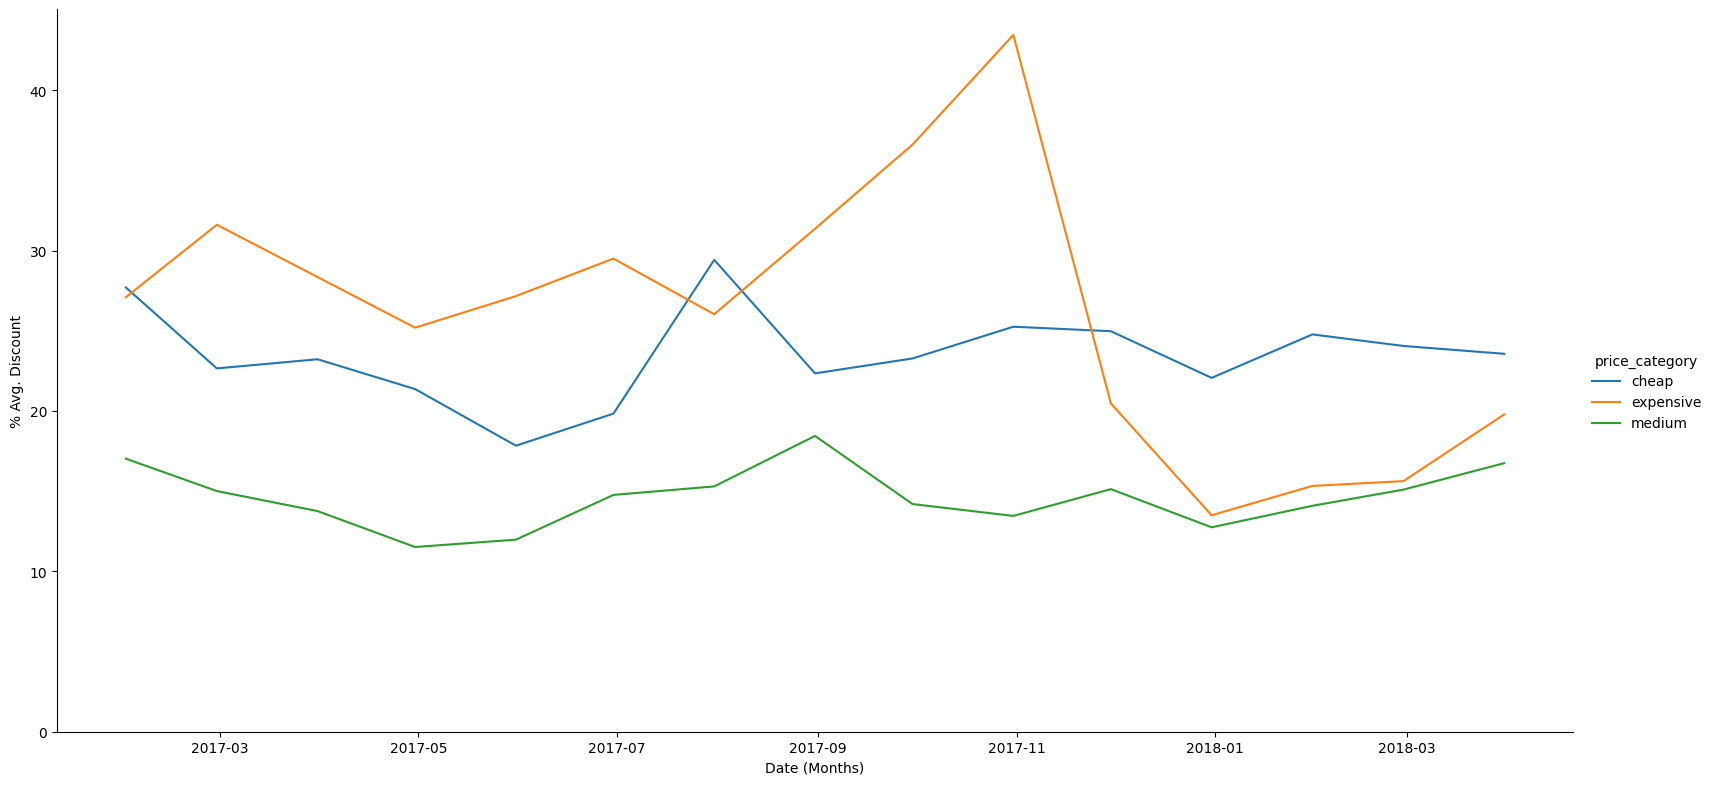

In [ ]:
sns.relplot(grouped_df, x='date', y='%discount', kind='line', hue='price_category', aspect=2, height=8);plt.ylim(0)
for ax in plt.gcf().axes:
    ax.set(xlabel='Date (Months)', ylabel='% Avg. Discount')

In [ ]:
grouped_df_rev = all_merged_df.groupby('price_category').apply(lambda x: x.resample('M', on='date').agg({'product_quantity':'sum', '%revenue':'sum'}).round(2))
grouped_df_rev

product_quantity  %revenue
price_category date                                  
cheap          2017-01-31              5798      3.70
               2017-02-28              2283      1.71
               2017-03-31               191      0.15
               2017-04-30              1699      1.24
               2017-05-31              1944      1.53
               2017-06-30              1531      1.12
               2017-07-31              3450      2.30
               2017-08-31              2260      1.72
               2017-09-30              2032      1.54
               2017-10-31              3026      2.42
               2017-11-30              6872      5.91
               2017-12-31              4970      3.87
               2018-01-31              5073      3.75
               2018-02-28              3224      2.60
               2018-03-31              1489      1.13
expensive      2017-01-31                 7      0.08
               2017-02-28                11      0.12
               2017-03-31                 0      0.00
               2017-04-30                 6      0.07
               2017-05-31                27      0.30
               2017-06-30                28      0.29
               2017-07-31                41      0.46
               2017-08-31                22      0.23
               2017-09-30                16      0.15
               2017-10-31                25      0.22
               2017-11-30                64      0.75
               2017-12-31                38      0.49
               2018-01-31                24      0.30
               2018-02-28                35      0.44
               2018-03-31                13      0.15
medium         2017-01-31               745      3.48
               2017-02-28               419      2.01
               2017-03-31                31      0.13
               2017-04-30               324      1.56
               2017-05-31               440      2.15
               2017-06-30               385      1.93
               2017-07-31               978      4.73
               2017-08-31               637      2.82
               2017-09-30               630      3.34
               2017-10-31               871      4.47
               2017-11-30              2538     13.22
               2017-12-31              1569      8.69
               2018-01-31              1352      7.29
               2018-02-28               774      3.86
               2018-03-31               339      1.62

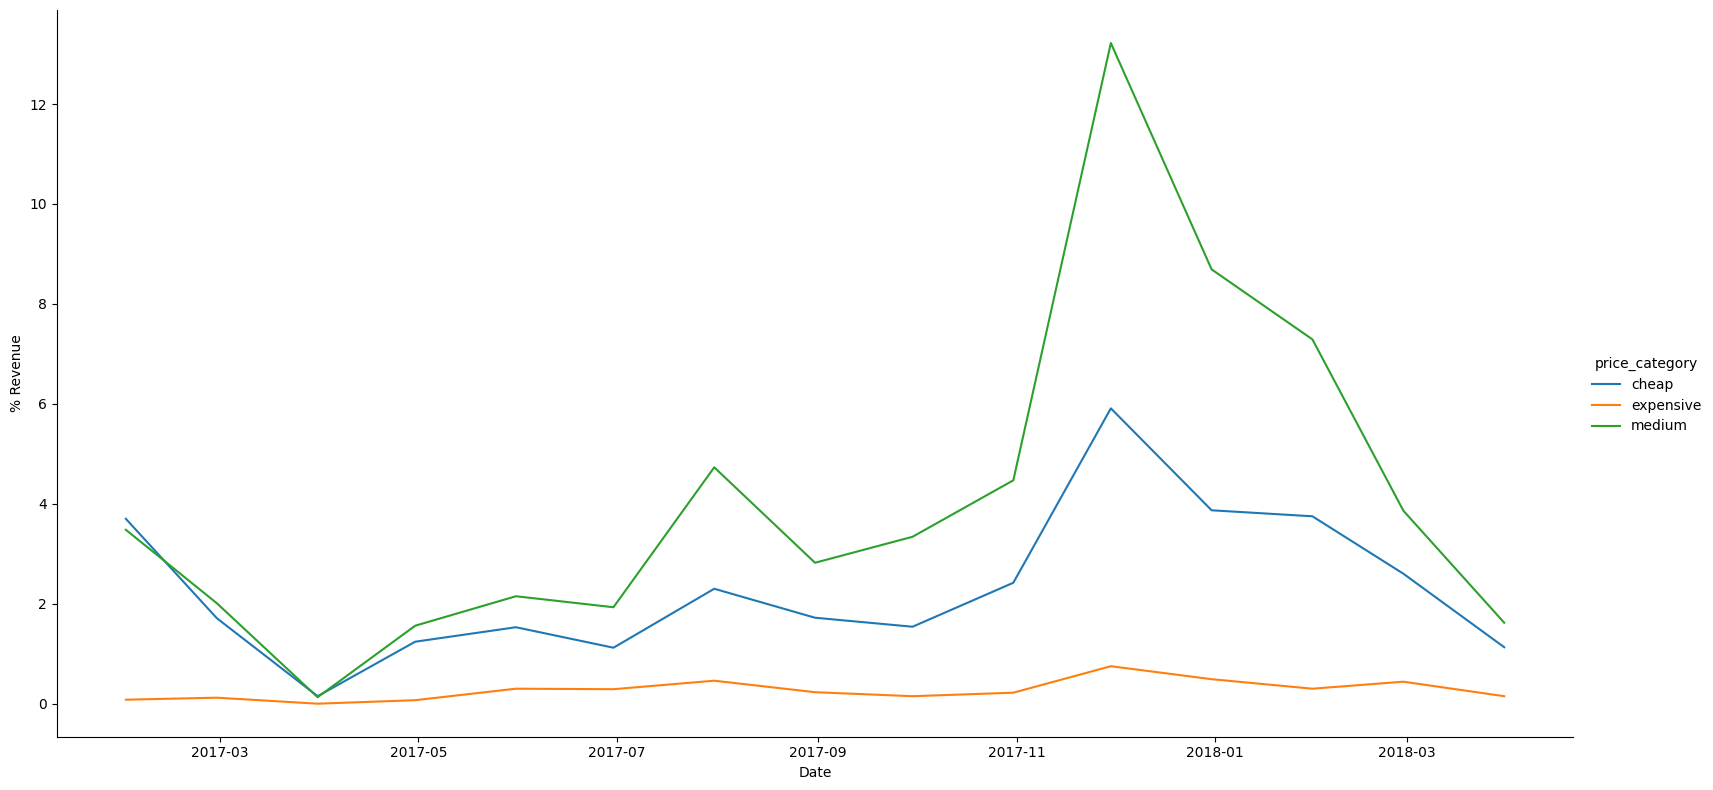

In [ ]:
sns.relplot(grouped_df_rev, x='date', y='%revenue', kind='line', hue='price_category', aspect=2, height=8);
for ax in plt.gcf().axes:
    ax.set(xlabel='Date', ylabel='% Revenue')

In [ ]:
grouped_df2 = all_merged_df.groupby('price_category').apply(lambda x: x.resample('M', on='date').agg({'revenue':'sum', '%discount':'mean'}).round(2))
grouped_df2

revenue  %discount
price_category date                            
cheap          2017-01-31  277227.38      27.71
               2017-02-28  127681.17      22.66
               2017-03-31   10966.85      23.23
               2017-04-30   92964.19      21.37
               2017-05-31  114484.61      17.84
               2017-06-30   83738.67      19.84
               2017-07-31  172027.41      29.43
               2017-08-31  128501.65      22.35
               2017-09-30  115310.78      23.28
               2017-10-31  180850.98      25.26
               2017-11-30  442446.82      24.98
               2017-12-31  289252.13      22.07
               2018-01-31  280946.93      24.78
               2018-02-28  194639.01      24.06
               2018-03-31   84363.41      23.57
expensive      2017-01-31    5741.91      27.10
               2017-02-28    8747.70      31.62
               2017-03-31       0.00        NaN
               2017-04-30    5128.93      25.20
               2017-05-31   22120.68      27.17
               2017-06-30   21780.81      29.51
               2017-07-31   34481.83      26.04
               2017-08-31   16927.06      31.37
               2017-09-30   11272.81      36.62
               2017-10-31   16199.49      43.46
               2017-11-30   56159.66      20.48
               2017-12-31   36331.81      13.50
               2018-01-31   22377.78      15.33
               2018-02-28   32684.29      15.63
               2018-03-31   11572.18      19.79
medium         2017-01-31  260207.72      17.03
               2017-02-28  150104.86      15.01
               2017-03-31   10037.74      13.76
               2017-04-30  116791.65      11.52
               2017-05-31  160635.53      11.98
               2017-06-30  144474.35      14.77
               2017-07-31  353737.09      15.30
               2017-08-31  211180.43      18.45
               2017-09-30  249811.23      14.20
               2017-10-31  334590.21      13.46
               2017-11-30  989651.33      15.13
               2017-12-31  650455.16      12.75
               2018-01-31  545512.49      14.09
               2018-02-28  288634.61      15.10
               2018-03-31  120968.13      16.75

In [ ]:
#sns.relplot(grouped_df2, y='revenue', x='%discount', kind='line', hue='price_category', aspect=2, height=8);plt.ylim(0)
#for ax in plt.gcf().axes:
    #ax.set(ylabel='Revenue (sum)', xlabel='% Avg. Discount')